In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import dateutil.parser
import re


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing 

#set jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

sns.set_style('whitegrid')
#show figures in notebook
%matplotlib inline

### Step 1: Reading and Understanding the Data

In [106]:
sale_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

sale_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,...,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,...,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,...,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [107]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [108]:
sale_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [109]:
sale_data.shape 

(1460, 81)

#### Observations:
- The dataset has 1460 rows/observations and 81 columns/features.
- The highest House sale price was 755,000.00 while the lowest was 34,900.00

### Step 2 : Data Cleaning and Preparation

In [110]:
#Checking for missing values
sale_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Under Alley collumn the abrivation NA is used to express 'No alley access'. BUt isnull function considered it as missing value. Therefore, instead of filling 0, it is better to fill the non value by  'NAac'-No Alley Access. It is also the same for 'poolQC','Fence','MiscFeature'

In [111]:
sale_data.fillna({'Alley':'NAac', 'PoolQC':'No_pool','Fence':'No_Fence','MiscFeature':'No_MiscFeature','MasVnrType':'CBlock'}, inplace=True)

sale_data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'CBlock'], dtype=object)

In [112]:
sale_data=sale_data.fillna(0)

In [113]:
#Checking for duplicates
sale_data.duplicated().sum()

0

In [114]:
#Checking for mmissing values again
sale_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

#### Observations:

- There are missing values in some column of the dataset.
- There are no duplicates.
- There for the dataset is cleaned by using fillna.  

In [115]:
#Summary of the object or categorical columns by first creating a variable that holds such columns
object_col = sale_data.dtypes[sale_data.dtypes=='object'].index
sale_data[object_col].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,5,4,5,6,5,5,5,7,7,6,5,2,6,4,7,6,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NAac,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,0,Attchd,Unf,TA,TA,Y,No_pool,No_Fence,No_MiscFeature,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,690,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [116]:
#Dropping the Id column as it is not significant in predicting house price
sale_data.drop('Id', axis= 1, inplace=True)
sale_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NAac,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_pool,No_Fence,No_MiscFeature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NAac,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_pool,No_Fence,No_MiscFeature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NAac,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_pool,No_Fence,No_MiscFeature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NAac,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_pool,No_Fence,No_MiscFeature,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NAac,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_pool,No_Fence,No_MiscFeature,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NAac,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,...,0,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No_pool,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NAac,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,...,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No_pool,No_Fence,No_MiscFeature,0,8,2007,WD,Normal,307000
7,60,RL,0.0,10382,Pave,NAac,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,...,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No_pool,No_Fence,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NAac,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,...,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,No_pool,No_Fence,No_MiscFeature,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NAac,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,...,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,No_pool,No_Fence,No_MiscFeature,0,1,2008,WD,Normal,118000


### EDA

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


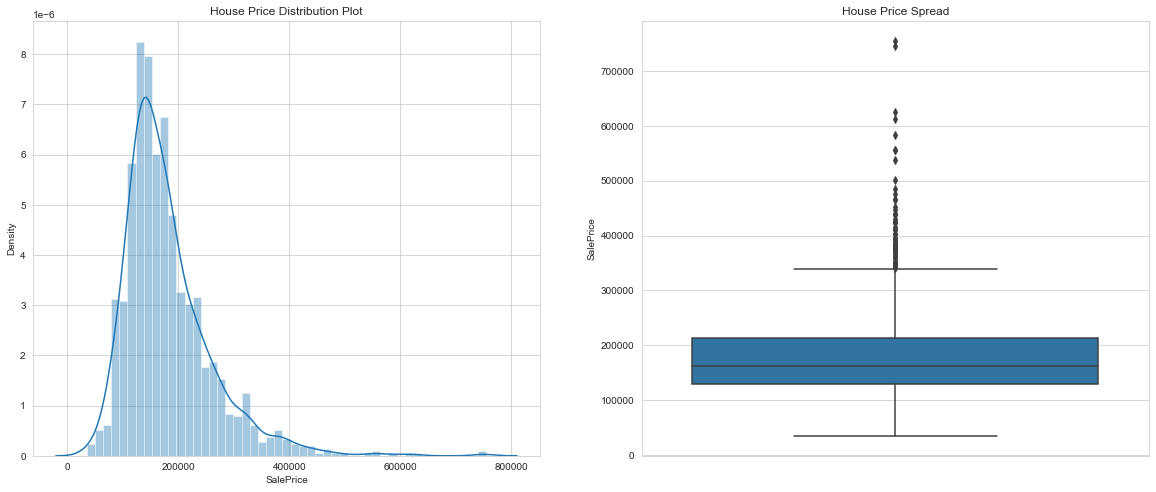

In [117]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(sale_data.SalePrice)

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=sale_data.SalePrice)

plt.show()

#### Step 3.1 : Visualising catagorical data

In [118]:
av_price_MSZoning= sale_data.groupby('MSZoning').SalePrice.mean().reset_index()
av_price_MSZoning

,MSZoning,SalePrice
0,C (all),74528.000000
1,FV,214014.061538
2,RH,131558.375000
3,RL,191004.994787
4,RM,126316.830275


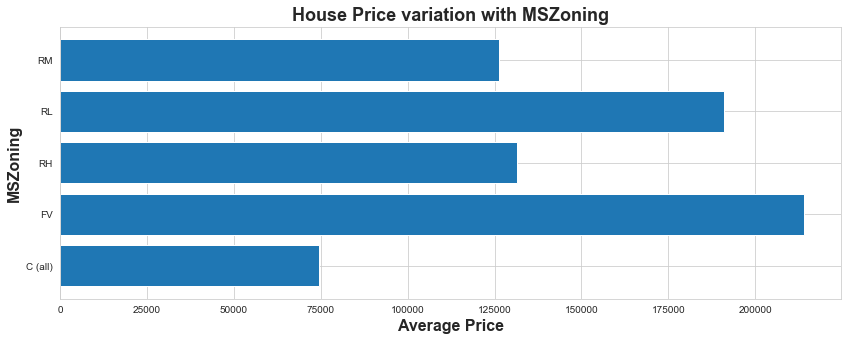

In [119]:
plt.figure(figsize=(14, 5))

plt.barh(av_price_MSZoning.MSZoning, av_price_MSZoning.SalePrice)
plt.title('House Price variation with MSZoning', fontweight= 'bold', fontsize= 18)
plt.xlabel('Average Price',  fontweight= 'bold', fontsize= 16)
plt.ylabel('MSZoning',  fontweight= 'bold', fontsize= 16)
plt.show()

#### The chart above shows that House price vary significantly depending on the general zoning classification of the sale. House at Floating Village Residential and Residential Low Density  are more expensive than the others respectively. Whereas, houses at Commercial zone have relatively low price.

In [120]:
av_price_road_type= sale_data.groupby('Street').SalePrice.mean().reset_index()
av_price_road_type

,Street,SalePrice
0,Grvl,130190.500000
1,Pave,181130.538514


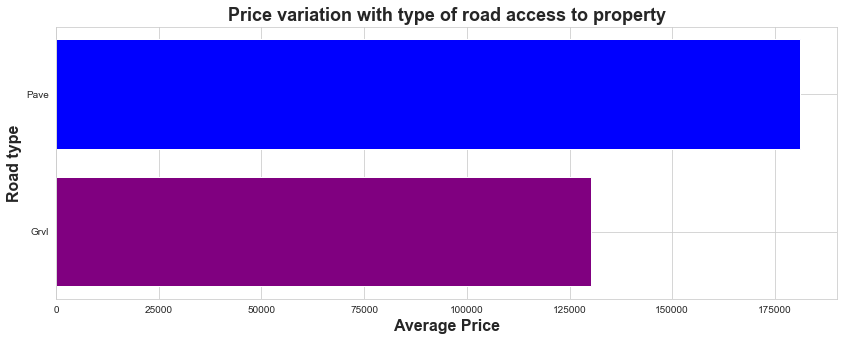

In [121]:
plt.figure(figsize=(14, 5))
colors= ['purple', 'blue']

plt.barh(av_price_road_type.Street, av_price_road_type.SalePrice, color = colors)
plt.title('Price variation with type of road access to property', fontweight= 'bold', fontsize= 18)
plt.xlabel('Average Price',  fontweight= 'bold', fontsize= 16)
plt.ylabel('Road type',  fontweight= 'bold', fontsize= 16)
plt.show()

#### As shown on the above chart the house price vary significantly depending on the road access to property. Houses with Grvl(Gravel) road access are more expensive than the ones that has an access for Pave (Paved) street.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

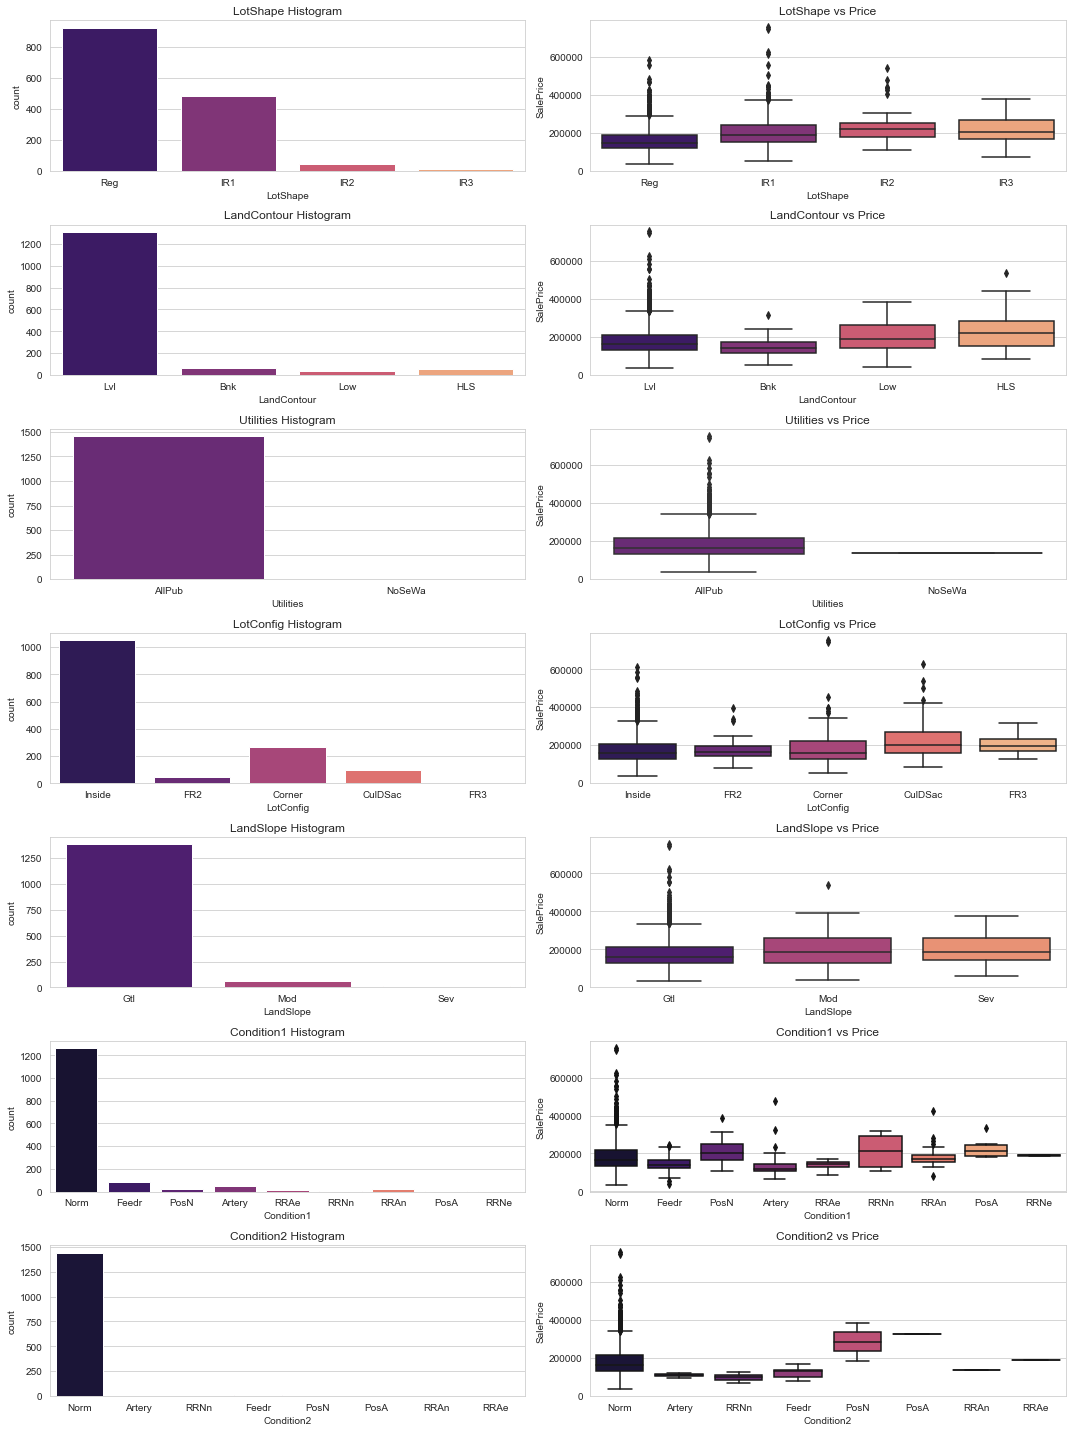

In [122]:
def plot_count(x,fig):
    plt.subplot(7,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(sale_data[x],palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=sale_data[x], y=sale_data.SalePrice, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('LotShape', 1)
plot_count('LandContour', 3)
plot_count('Utilities', 5)
plot_count('LotConfig', 7)
plot_count('LandSlope', 9)
plot_count('Condition1', 11)
plot_count('Condition2', 13)

plt.tight_layout()

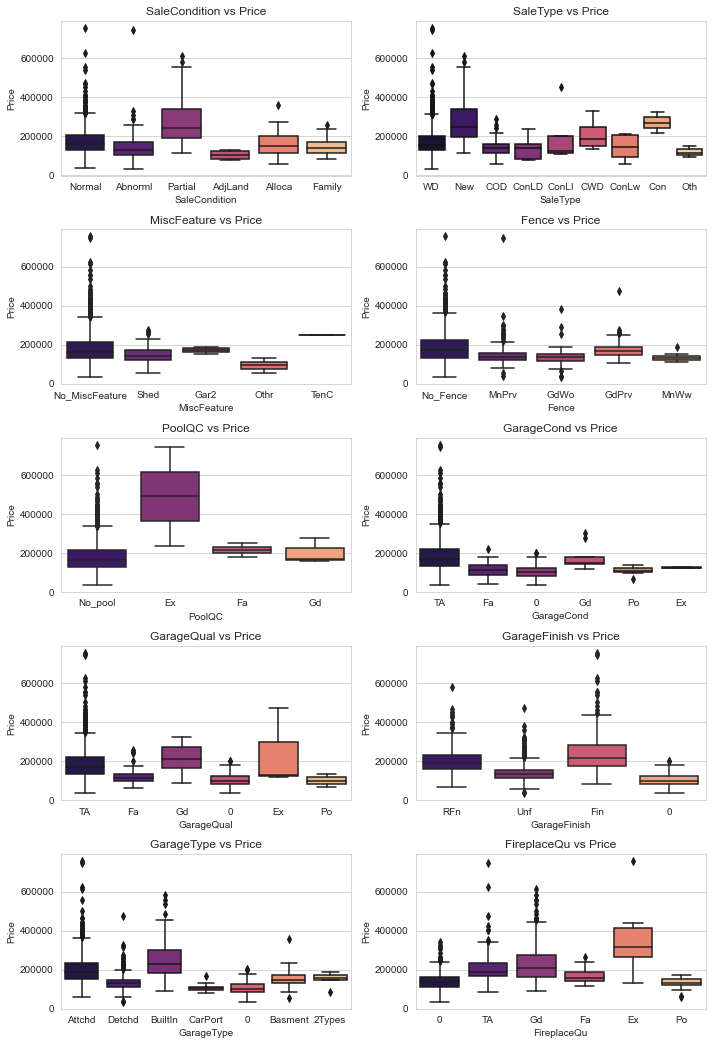

In [123]:
def scatter(x,fig):
    plt.subplot(7,2,fig)
    sns.boxplot(x=sale_data[x], y=sale_data.SalePrice, palette=("magma"))
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('SaleCondition', 1)
scatter('SaleType', 2)
scatter('MiscFeature', 3)
scatter('Fence', 4)
scatter('PoolQC', 5)
scatter('GarageCond', 6)
scatter('GarageQual', 7)
scatter('GarageFinish', 8)
scatter('GarageType', 9)
scatter('FireplaceQu', 10)

plt.tight_layout()

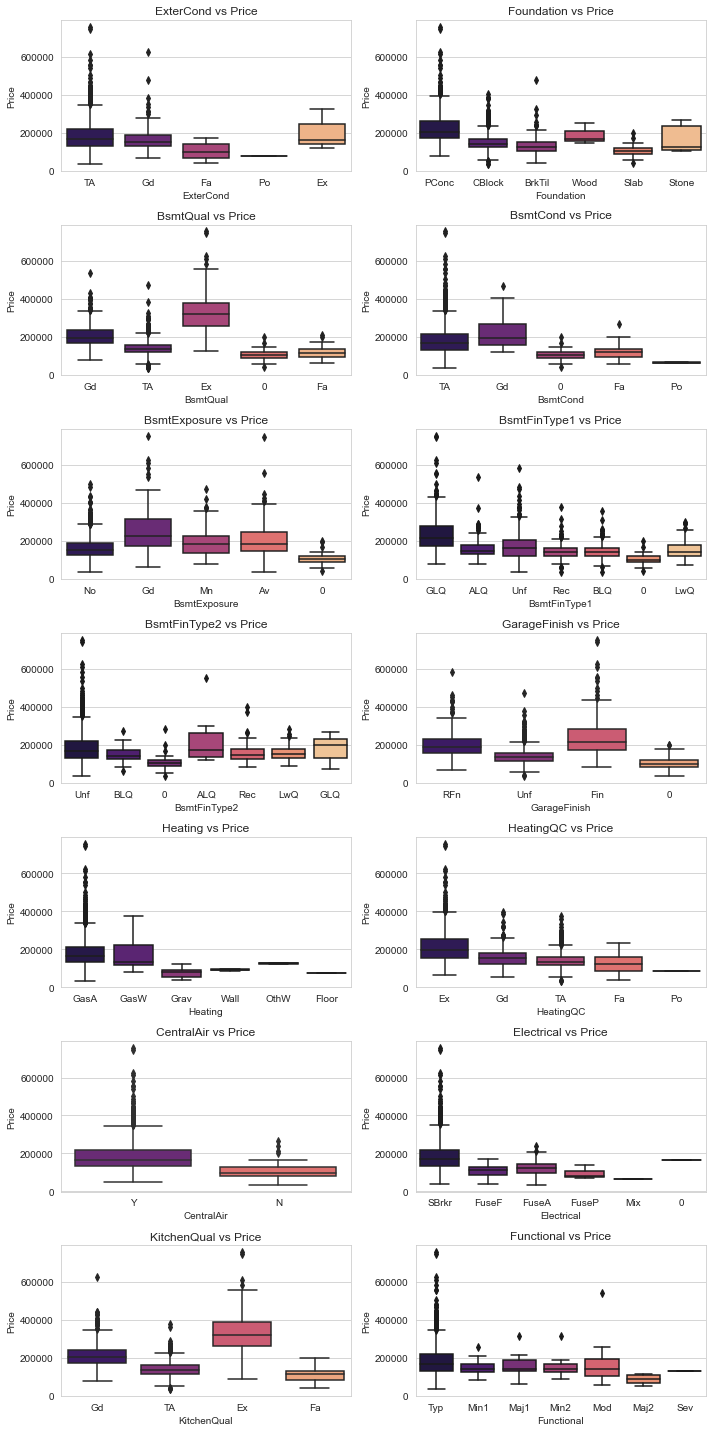

In [124]:
def scatter(x,fig):
    plt.subplot(7,2,fig)
    sns.boxplot(x=sale_data[x], y=sale_data.SalePrice, palette=("magma"))
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('ExterCond', 1)
scatter('Foundation', 2)
scatter('BsmtQual', 3)
scatter('BsmtCond', 4)
scatter('BsmtExposure', 5)
scatter('BsmtFinType1', 6)
scatter('BsmtFinType2', 7)
scatter('GarageFinish', 8)
scatter('Heating', 9)
scatter('HeatingQC', 10)
scatter('CentralAir', 11)
scatter('Electrical', 12)
scatter('KitchenQual', 13)
scatter('Functional', 14)

plt.tight_layout()

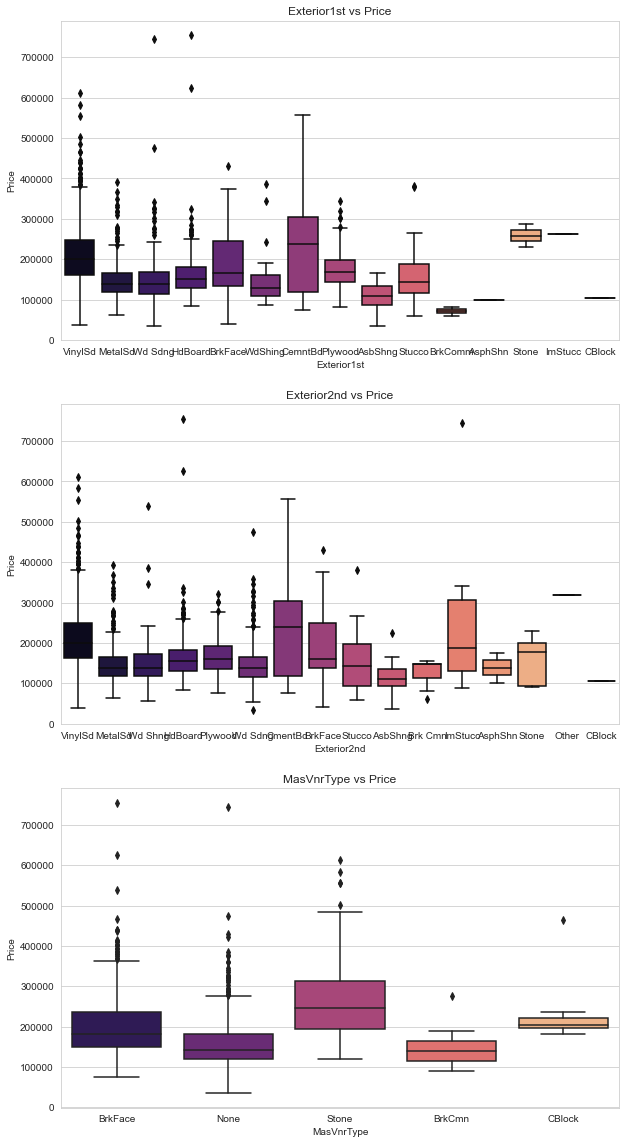

In [125]:
def scatter(x,fig):
    plt.subplot(3,1,fig)
    sns.boxplot(x=sale_data[x], y=sale_data.SalePrice, palette=("magma"))
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Exterior1st', 1)
scatter('Exterior2nd', 2)
scatter('MasVnrType', 3)

<Figure size 1800x432 with 0 Axes>

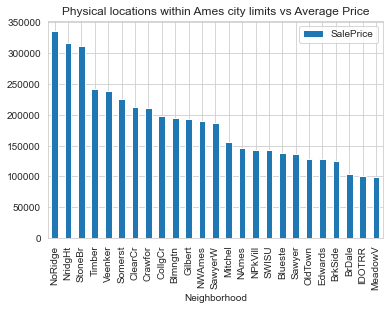

In [126]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(sale_data.groupby(['Neighborhood'])['SalePrice'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Physical locations within Ames city limits vs Average Price')
plt.show()

#### Inference :

1. Regular(Reg) shape houses are the most need shape and the cheapest one.However, there is no sugnificant difference between the categories in it.
2. Even though, Near Flat/Level properties are most common types of house, in terms of price there is no significant difference the categories in it. 
3. Almost most peoples need All public Utilities.   
4. Lot configuration shows that there is no significant difference b/n the price of this catagory and Inside lot is the most common lot. 
5. Slope of property shows there is no significant difference b/n the price of this catagory and Gentle slope is the most common lot. 
6. Proximity to various conditions indicates that Adjacent to arterial street is the most common condition. Adjacent to arterial street and condition Within 200' of North-South Railroad have the highest price.  Adjacent to arterial street and East-West Railroad have relatively low prices. 
7. under condition2  normal condition is the most common and Houses Near positive off-site feature--park, greenbelt, etc. have the highest price.
8. In terms of Physical locations within Ames city limits, Northridge have the highest price and Meadow Village have the lowest price.

#### Step 3.2 : Visualising numerical data

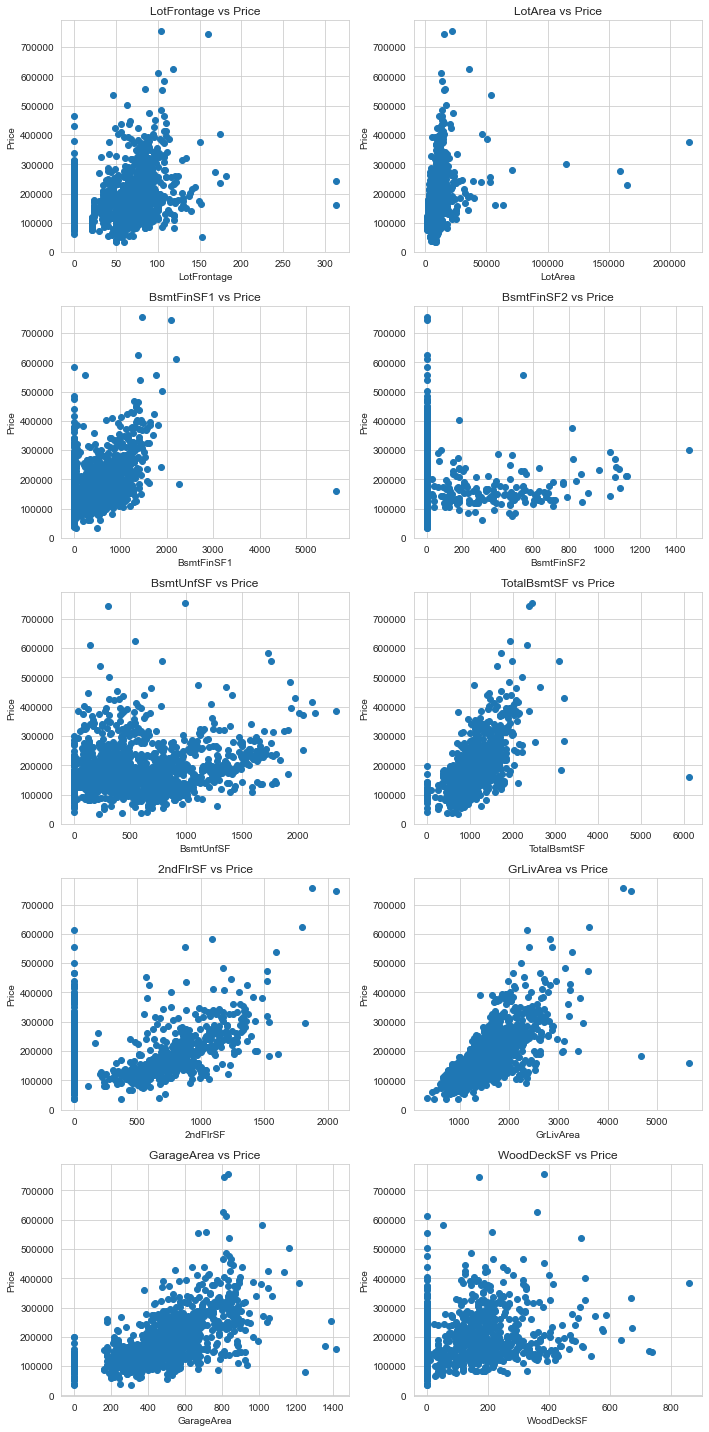

In [127]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(sale_data[x],sale_data['SalePrice'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('LotFrontage', 1)
scatter('LotArea', 2)
scatter('BsmtFinSF1', 3)
scatter('BsmtFinSF2', 4)
scatter('BsmtUnfSF', 5)
scatter('TotalBsmtSF', 6)
scatter('2ndFlrSF', 7)
scatter('GrLivArea', 8)
scatter('GarageArea', 9)
scatter('WoodDeckSF', 10)

plt.tight_layout()

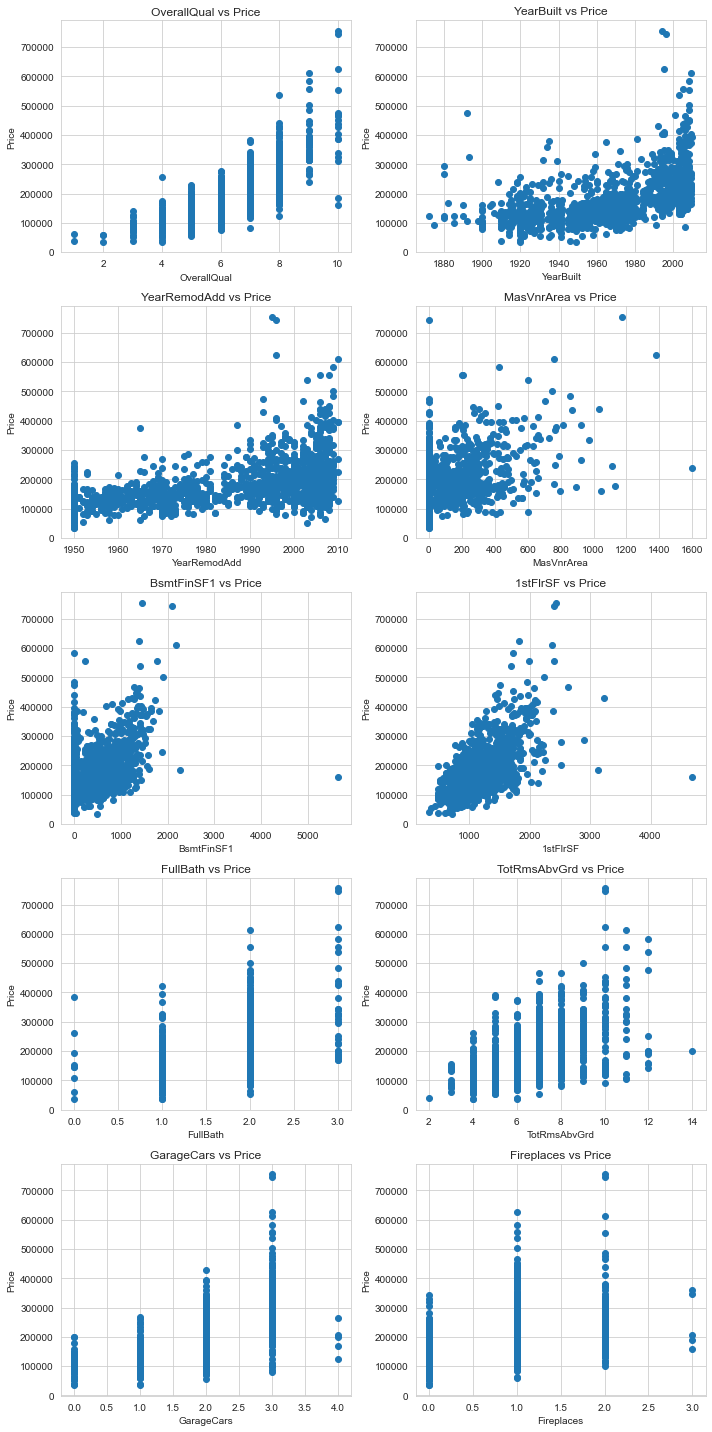

In [128]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(sale_data[x],sale_data['SalePrice'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('OverallQual', 1)
scatter('YearBuilt', 2)
scatter('YearRemodAdd', 3)
scatter('MasVnrArea', 4)
scatter('BsmtFinSF1', 5)
scatter('1stFlrSF', 6)
scatter('FullBath', 7)
scatter('TotRmsAbvGrd', 8)
scatter('GarageCars', 9)
scatter('Fireplaces', 10)

plt.tight_layout()

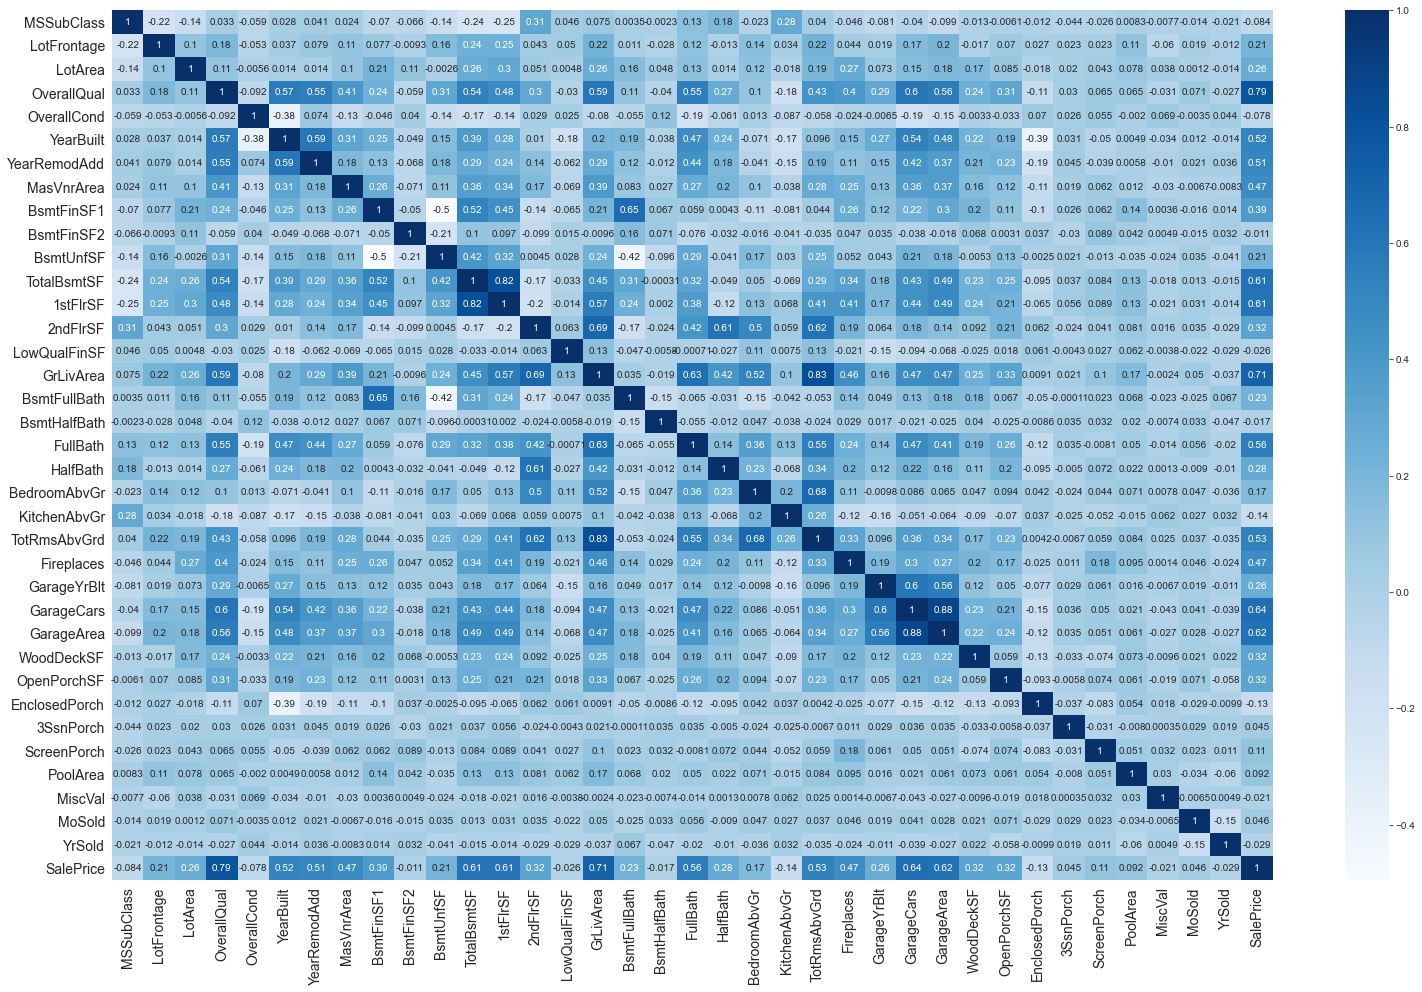

In [129]:
plt.figure(figsize=(26, 16))
a= sale_data.corr()
sns.heatmap(a, annot= True, cmap= 'Blues')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

#### Visualizations showing the relationship between house price and some selected numerical features(criiteria of selection is correlation values of > +or- 0.5

#### Inference :

1. 'GrLivArea'(Above grade (ground) living area square feet),'YearBuilt', 'YearRemodAdd','1stFlrSF'(First Floor square feet) and '2ndFlrSF'(Second floor square feet), 'MasVnrArea','BsmtFinSF1','TotalBsmtSF','FullBath','TotRmsAbvGrd','GarageCars','Fireplaces','GarageArea' seems to have a poitive correlation with `price`. OverallQual

2. while the others doesn't show that much significant trend with price.

### List of significant variables after Visual analysis :

#### List of significant catagorical variables 
MSZoning
Street
Condition1
Condition2
SaleCondition
SaleType
MiscFeature
PoolQC
GarageCond
GarageQual
GarageFinish
GarageType
FireplaceQu
BsmtQual
BsmtCond
Heating
CentralAir
Electrical
KitchenQual
Exterior1st
Exterior2nd
MasVnrType
Neighborhood
#### List of significant numerical variables 
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea

### Step 4: Feature Selection

In [130]:
sale_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [131]:
top_15_w_target = sale_data.corr()['SalePrice'].sort_values(ascending = False).keys()[0:16]
print(top_15_w_target)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF',
       '2ndFlrSF'],
      dtype='object')


In [132]:
top_15_data = sale_data.loc[:, top_15_w_target].copy()
top_15_data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,706,0,854
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,978,298,0
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,486,0,866
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,216,0,756
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,655,192,1053


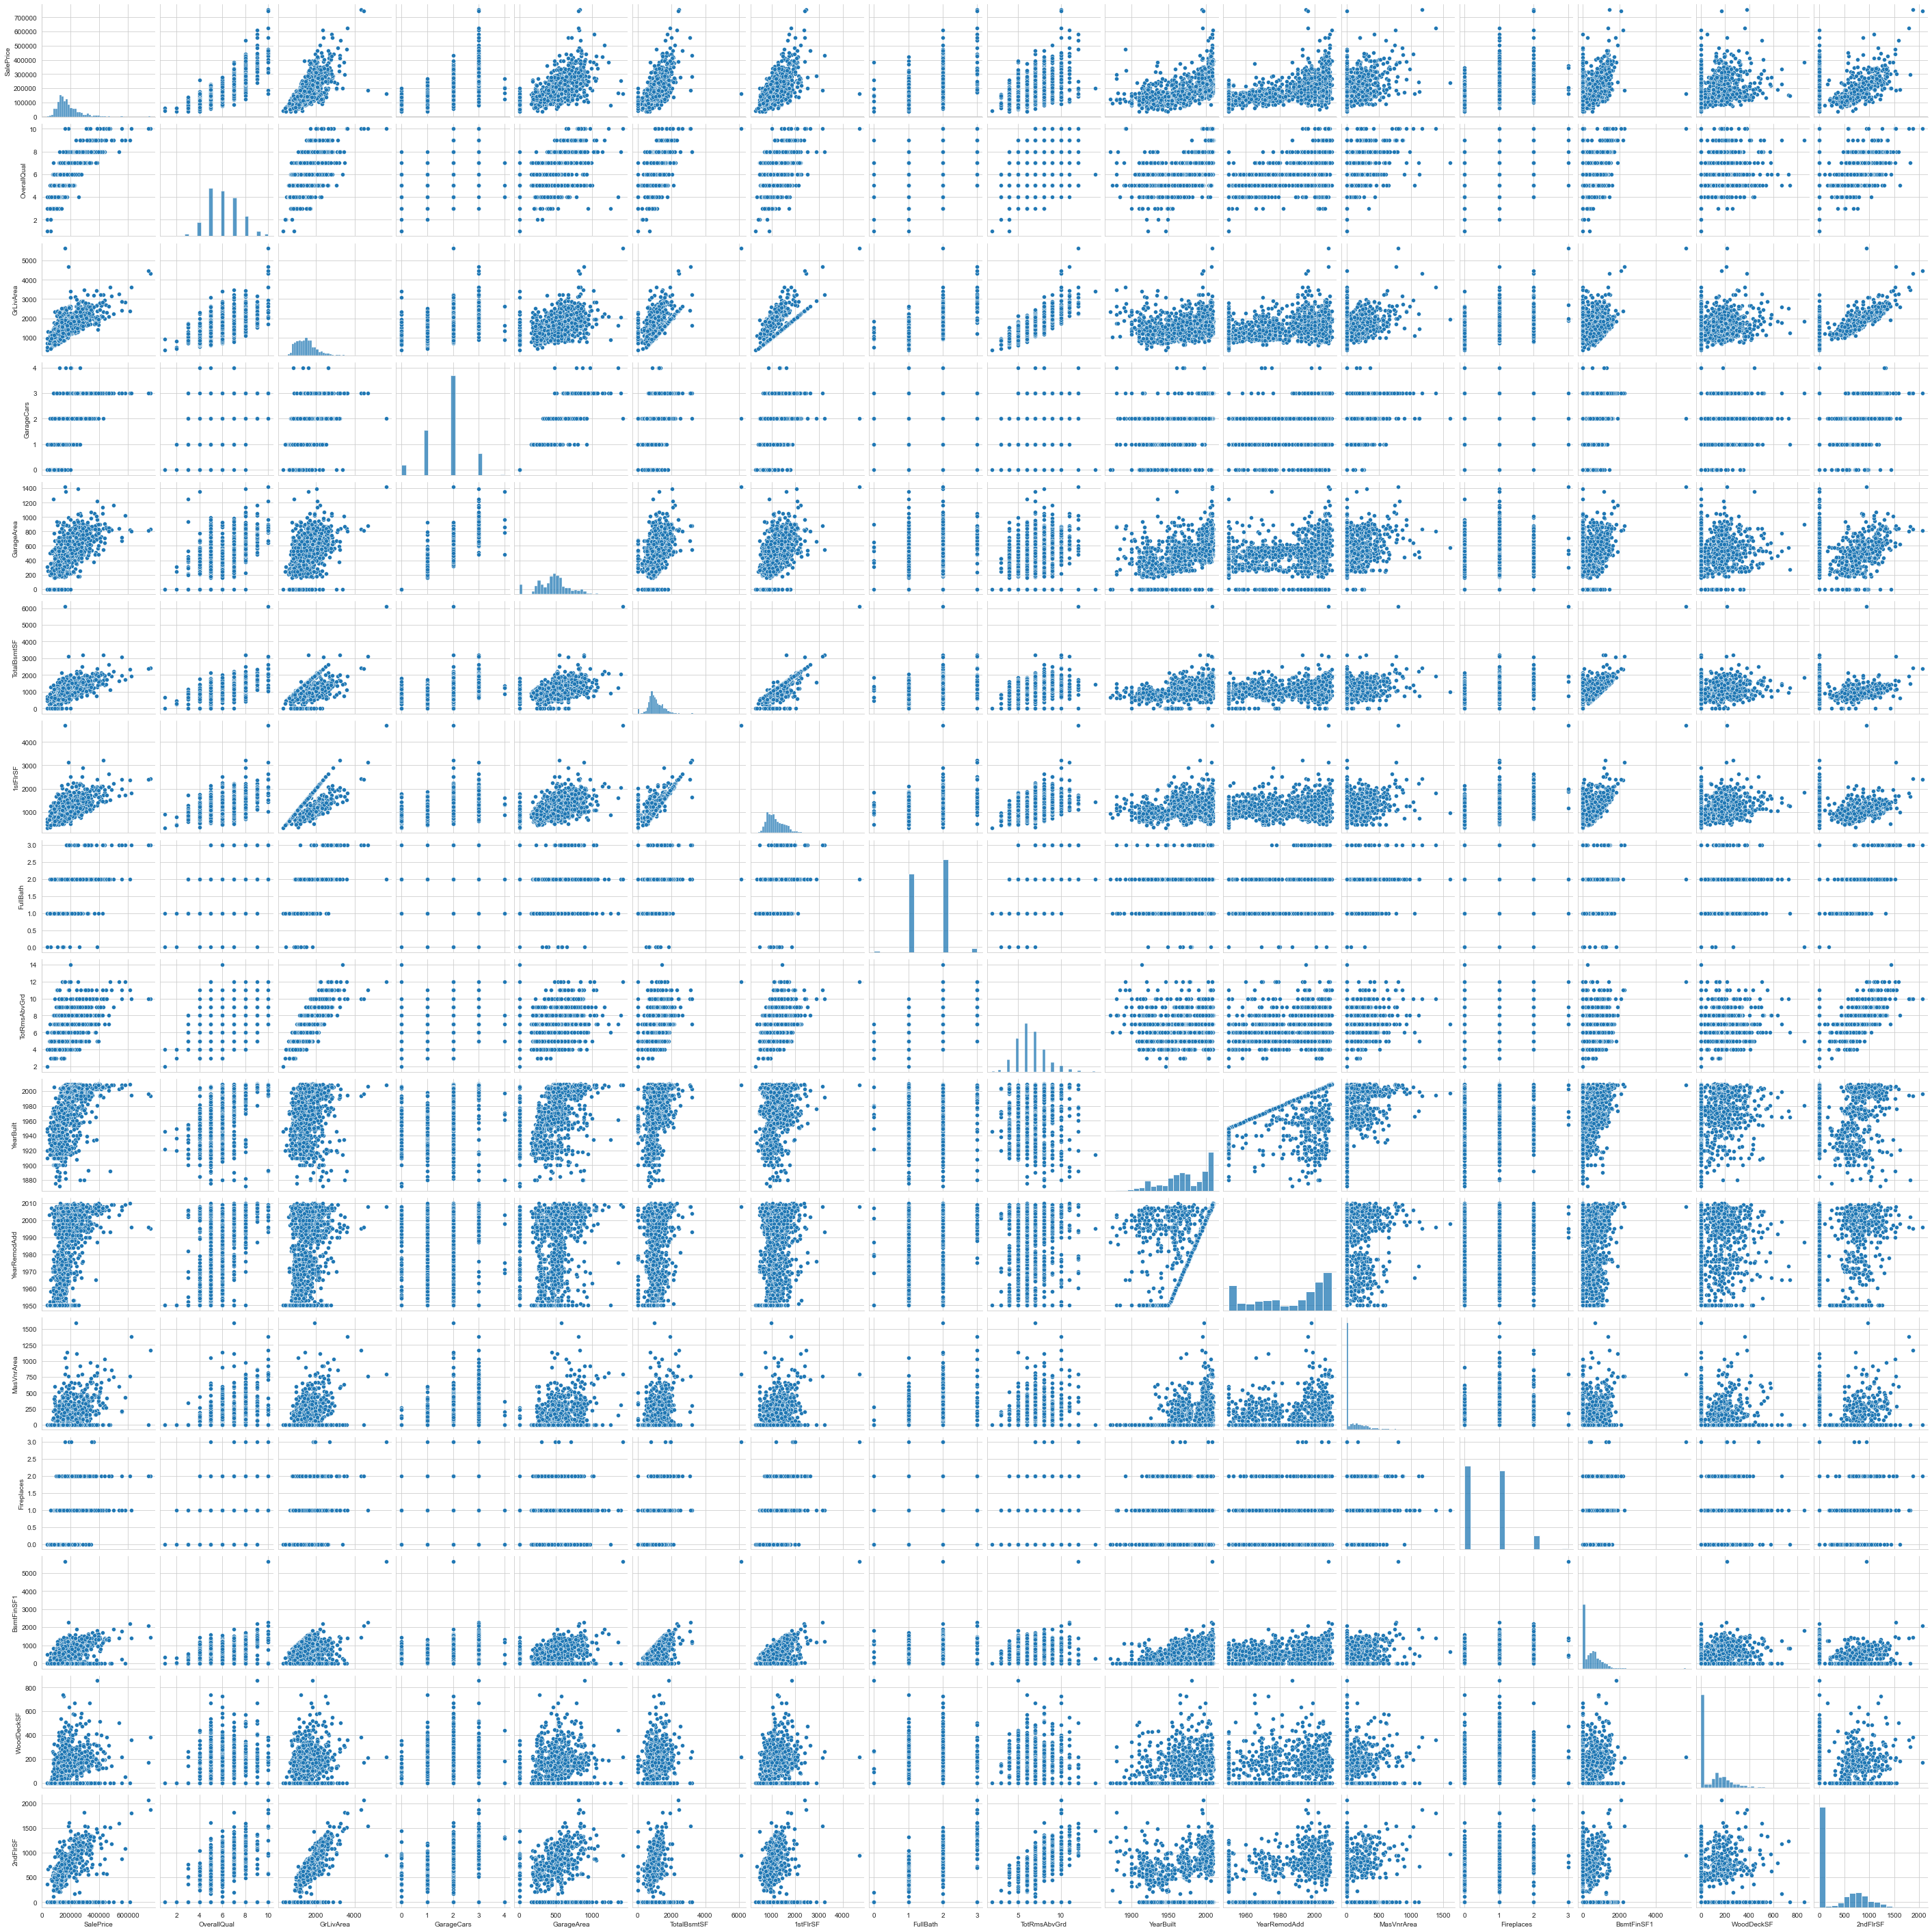

In [133]:
sns.pairplot(top_15_data)

### Step 5: Model the data

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [135]:
X = top_15_data.drop('SalePrice', axis=1)
y = top_15_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


In [136]:
X_train.shape

(1022, 15)

#### Each of the numeric features in the dataset has a different scale. As regression models are distanced based, all features to be compared fairly.

In [137]:
# train
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=[X_train.columns])
X_train
# test
scaler = preprocessing.StandardScaler().fit(X_test)
X_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, columns=[X_test.columns])
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF
0,1.367412,0.535520,0.32670,0.545407,-0.432967,-0.754264,0.787685,0.340070,1.184176,1.086520,-0.527454,-1.001036,-0.941958,0.415193,1.293475
1,-0.075784,0.240033,0.32670,0.327143,1.376251,1.300292,0.787685,-0.933013,0.712076,0.458817,-0.527454,0.616875,-0.607328,-0.765627,-0.815863
2,-0.075784,1.382844,0.32670,-0.162741,-0.847273,1.185390,0.787685,0.976612,-0.198402,-0.893160,-0.527454,0.616875,-0.988114,4.039654,0.648046
3,-1.518981,-0.325501,-1.02325,-1.239514,-0.874239,-0.907467,-1.037743,0.976612,-1.580980,-1.665718,-0.527454,-1.001036,-0.988114,-0.765627,0.395486
4,-0.075784,-0.049583,-1.02325,-1.210412,-0.702633,-1.055198,-1.037743,0.340070,-2.221687,0.507102,-0.527454,-1.001036,-0.988114,-0.298219,0.851496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-1.518981,-0.716875,0.32670,0.302891,-0.844821,-1.213872,-1.037743,-0.296472,-1.749587,-1.665718,-0.527454,-1.001036,-0.988114,-0.519623,0.189697
434,-0.797382,-0.754055,-1.02325,-0.861188,-1.644015,-1.547634,-1.037743,-0.933013,-0.029795,0.989950,-0.076040,-1.001036,-0.182695,-0.478622,0.430564
435,0.645814,0.091312,0.32670,0.322292,1.221806,1.092374,0.787685,0.340070,1.116733,0.989950,0.716686,0.616875,1.783543,-0.765627,-0.815863
436,0.645814,0.146104,1.67665,0.943134,0.841821,1.168975,0.787685,0.340070,1.184176,1.086520,0.188202,0.616875,1.291983,0.406993,-0.815863


#### Fit linear regression model

In [138]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [139]:
y_train_predicted = linreg.predict(X_train)
y_test_predicted = linreg.predict(X_test)

In [140]:
linreg_train_r2 = linreg.score(X_train, y_train)
linreg_test_r2 = linreg.score(X_test, y_test)
print("Training R^2")
print(linreg_train_r2)
print("Test R^2")
print(linreg_test_r2)

Training R^2
0.7890974189799083
Test R^2
0.7899444429574219


In [141]:
linreg_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
linreg_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
print("Training RMSE, Test RMSE")
print(linreg_train_rmse, linreg_test_rmse)

Training RMSE, Test RMSE
37240.39724461929 34525.661120531186


##### What this means above is that the training set is ± $37,240 and  the  test set is ± $34,525. In other works the prediction could be “out by” that amount.

#### Test the moddel by adding some relevant catagorical variables

In [143]:
SaleData = sale_data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd','MSZoning','GarageFinish','GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage','KitchenQual','CentralAir','Street','Neighborhood','Heating']]

In [144]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the SaleData

SaleData = dummies('MSZoning',SaleData)
SaleData = dummies('GarageFinish',SaleData)
SaleData = dummies('KitchenQual',SaleData)
SaleData = dummies('CentralAir',SaleData)
SaleData = dummies('Street',SaleData)
SaleData = dummies('Neighborhood',SaleData)
SaleData = dummies('Heating',SaleData)

In [145]:
X = SaleData.drop('SalePrice', axis=1)
y = SaleData['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [146]:
X_train.shape

(1022, 56)

In [147]:
# train
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=[X_train.columns])
X_train
# test
scaler = preprocessing.StandardScaler().fit(X_test)
X_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, columns=[X_test.columns])
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,FV,RH,RL,RM,Fin,RFn,Unf,Fa,Gd,TA,...,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,GasA,GasW,Grav,OthW,Wall
0,1.367412,0.535520,0.32670,0.545407,-0.432967,-0.754264,0.787685,0.340070,1.184176,1.086520,0.307363,-0.527454,-1.001036,-0.941958,0.344549,-0.194717,-0.096003,0.512101,-0.421212,-0.575593,1.514342,-0.800281,-0.194717,1.220097,-1.009175,...,3.244428,-0.188311,-0.308221,-0.275984,-0.160503,-0.127441,-0.212946,-0.413670,-0.096003,-0.240772,-0.188311,-0.212946,-0.271163,-0.127441,-0.181711,-0.200948,-0.229967,-0.117851,-0.181711,-0.083045,0.174895,-0.127441,-0.117851,0.0,0.0
1,-0.075784,0.240033,0.32670,0.327143,1.376251,1.300292,0.787685,-0.933013,0.712076,0.458817,0.276905,-0.527454,0.616875,-0.607328,-0.186729,-0.194717,-0.096003,0.512101,-0.421212,-0.575593,1.514342,-0.800281,-0.194717,1.220097,-1.009175,...,-0.308221,-0.188311,-0.308221,-0.275984,-0.160503,-0.127441,-0.212946,-0.413670,-0.096003,-0.240772,-0.188311,-0.212946,-0.271163,-0.127441,-0.181711,4.976415,-0.229967,-0.117851,-0.181711,-0.083045,0.174895,-0.127441,-0.117851,0.0,0.0
2,-0.075784,1.382844,0.32670,-0.162741,-0.847273,1.185390,0.787685,0.976612,-0.198402,-0.893160,0.218164,-0.527454,0.616875,-0.988114,-1.662499,-0.194717,-0.096003,0.512101,-0.421212,-0.575593,-0.660353,1.249561,-0.194717,1.220097,-1.009175,...,-0.308221,-0.188311,3.244428,-0.275984,-0.160503,-0.127441,-0.212946,-0.413670,-0.096003,-0.240772,-0.188311,-0.212946,-0.271163,-0.127441,-0.181711,-0.200948,-0.229967,-0.117851,-0.181711,-0.083045,0.174895,-0.127441,-0.117851,0.0,0.0
3,-1.518981,-0.325501,-1.02325,-1.239514,-0.874239,-0.907467,-1.037743,0.976612,-1.580980,-1.665718,0.161599,-0.527454,-1.001036,-0.988114,0.019879,-0.194717,-0.096003,-1.952738,2.374103,-0.575593,-0.660353,1.249561,-0.194717,-0.819607,0.990909,...,-0.308221,-0.188311,-0.308221,-0.275984,-0.160503,-0.127441,-0.212946,-0.413670,-0.096003,-0.240772,-0.188311,-0.212946,3.687818,-0.127441,-0.181711,-0.200948,-0.229967,-0.117851,-0.181711,-0.083045,0.174895,-0.127441,-0.117851,0.0,0.0
4,-0.075784,-0.049583,-1.02325,-1.210412,-0.702633,-1.055198,-1.037743,0.340070,-2.221687,0.507102,0.087629,-0.527454,-1.001036,-0.988114,0.108425,-0.194717,-0.096003,-1.952738,2.374103,-0.575593,-0.660353,1.249561,-0.194717,-0.819607,0.990909,...,-0.308221,-0.188311,-0.308221,-0.275984,6.230424,-0.127441,-0.212946,-0.413670,-0.096003,-0.240772,-0.188311,-0.212946,-0.271163,-0.127441,-0.181711,-0.200948,-0.229967,-0.117851,-0.181711,-0.083045,0.174895,-0.127441,-0.117851,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-1.518981,-0.716875,0.32670,0.302891,-0.844821,-1.213872,-1.037743,-0.296472,-1.749587,-1.665718,0.248622,-0.527454,-1.001036,-0.988114,0.108425,-0.194717,-0.096003,-1.952738,-0.421212,-0.575593,1.514342,-0.800281,-0.194717,-0.819607,0.990909,...,-0.308221,-0.188311,-0.308221,-0.275984,6.230424,-0.127441,-0.212946,-0.413670,-0.096003,-0.240772,-0.188311,-0.212946,-0.271163,-0.127441,-0.181711,-0.200948,-0.229967,-0.117851,-0.181711,-0.083045,0.174895,-0.127441,-0.117851,0.0,0.0
434,-0.797382,-0.754055,-1.02325,-0.861188,-1.644015,-1.547634,-1.037743,-0.933013,-0.029795,0.989950,0.229042,-0.076040,-1.001036,-0.182695,0.403579,-0.194717,-0.096003,0.512101,-0.421212,-0.575593,-0.660353,1.249561,-0.194717,-0.819607,0.990909,...,-0.308221,-0.188311,-0.308221,-0.275984,-0.160503,-0.127441,-0.212946,2.417385,-0.096003,-0.240772,-0.188311,-0.212946,-0.271163,-0.127441,-0.181711,-0.200948,-0.229967,-0.117851,-0.181711,-0.083045,0.174895,-0.127441,-0.117851,0.0,0.0
435,0.645814,0.091312,0.32670,

In [148]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [149]:
y_train_predicted = linreg.predict(X_train)
y_test_predicted = linreg.predict(X_test)

In [150]:
linreg_train_r2 = linreg.score(X_train, y_train)
linreg_test_r2 = linreg.score(X_test, y_test)
print("Training R^2")
print(linreg_train_r2)
print("Test R^2")
print(linreg_test_r2)

Training R^2
0.845151203864335
Test R^2
0.8084954552844111


In [151]:
linreg_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
linreg_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
print("Training RMSE, Test RMSE")
print(linreg_train_rmse, linreg_test_rmse)

Training RMSE, Test RMSE
31910.03454079448 32965.8636717426
